In [1]:
import numpy as np
import gym

In [2]:
np.random.seed(53)

The CartPole environment provided by OpenAi GYM offers a nice environment to test different hypothesis quickly. The action space is discrete and 2 dimensional, allowing actions of either -1 or 1 while the state space is 4 dimensional. The objective is to balance the pole on top of the cart.

Q: How effective is random search of policy space in uncovering an "optimal" policy and is there more than one policy that succeeds in satisfying the objective?

In [3]:
def generate_policies():
    return (np.random.uniform(-1,1, size=4), np.random.uniform(-1,1))

def get_actions(pi, o):
    W, b = pi
    return 1 if (np.dot(W, o) + b) > 0 else 0

def run(env, pi, steps_ub=1000, render=False):
    o = env.reset()
    total_r = 0
    for i in range(steps_ub):
        if render:
            env.render()
        a = get_actions(pi, o)
        o, r, done, _ = env.step(a)
        total_r += r
        if done:
            break
    return total_r


In [4]:
env = gym.make('CartPole-v0')

best_scores = []
best_weights = []
for n in range(1,300,20):
    policy_samples = [generate_policies() for _ in range(n)]
    scores = [run(env, pi) for pi in policy_samples]
    best_pi = policy_samples[np.argmax(scores)]
    best_scores.append(np.max(scores))
    best_weights.append(best_pi)


INFO:gym.envs.registration:Making new env: CartPole-v0
[2017-11-09 00:05:00,387] Making new env: CartPole-v0


We can see random search quickly is able score highly just based on even 100 samples.

In [5]:
best_scores

[10.0,
 34.0,
 131.0,
 63.0,
 200.0,
 113.0,
 200.0,
 167.0,
 200.0,
 200.0,
 133.0,
 200.0,
 200.0,
 200.0,
 200.0]

In [6]:
m = None
for i, weights in enumerate(best_weights):
    if i == 0:
        m = np.concatenate((weights[0],np.array([weights[1]])),axis=0)
    else:
        out = np.concatenate((weights[0],np.array([weights[1]])),axis=0)
        m = np.vstack((m,out))

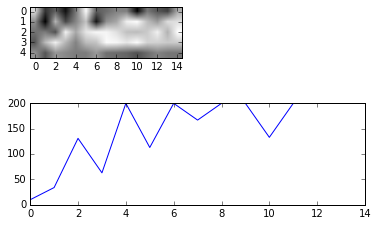

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

normalized = (m-np.min(m))/(np.max(m)-np.min(m))
normalized
plt.figure(1)
plt.subplot(221)
plt.imshow(normalized.T, cmap="gray")
plt.subplot(212)
plt.plot(best_scores)

Zooming in on the last 5 trials where we started to see consistent results of +200 in total rewards, we can clearly see that the parameters are different. Different parameter values are leading to "best" results, and can visually validate that the "best" policies are local optima at best.

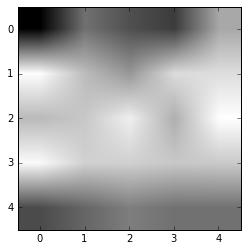

In [8]:
# The vertical axis represents the 4 parameters found in W and the last represents b
# The horizontal axis is the last sets of trials representing n samples of 201, 221, 241, 261, 281 sample policies.
plt.imshow(normalized[10:].T, cmap="gray")